<a href="https://colab.research.google.com/github/eD07/ChallengeDataScienceTelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## 📥 Importar

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

- 📁 Leyendo el archivo JSON



In [2]:
## Leyendo el archivo JSON

# URL RAW del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/eD07/ChallengeDataScienceTelecomX/main/TelecomX_Data.json"

# Lee el archivo JSON
df = pd.read_json(url)

# Muestra las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

- 🔍 Viendo información del dato


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


- 🧩 Transformando columnas tipo diccionario



In [4]:
# Lista de columnas que contienen diccionarios anidados
dict_cols = ['customer', 'phone', 'account', 'internet']

for col in dict_cols:
    if col in df.columns:
        # Normaliza la columna tipo diccionario a columnas planas
        expanded = pd.json_normalize(df[col])
        # Elimina la columna original y concatena las nuevas columnas
        df = pd.concat([df.drop(col, axis=1), expanded], axis=1)


In [5]:
df.sample(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1968,2794-XIMMO,Yes,Male,0,Yes,No,53,No,No phone service,One year,...,Electronic check,60.45,3184.25,DSL,No,Yes,Yes,Yes,Yes,Yes
6852,9451-WLYRI,No,Female,0,Yes,No,53,Yes,No,One year,...,Credit card (automatic),19.05,990.45,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5106,6980-CDGFC,No,Female,0,Yes,No,67,Yes,No,One year,...,Bank transfer (automatic),20.85,1327.4,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6231,8571-ZCMCX,No,Female,0,Yes,Yes,47,No,No phone service,Two year,...,Credit card (automatic),60.00,2768.65,DSL,Yes,Yes,Yes,No,Yes,Yes
1288,1850-AKQEP,No,Male,0,No,Yes,8,Yes,No,Month-to-month,...,Mailed check,20.35,178.7,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2782,3858-XHYJO,No,Female,0,Yes,No,40,Yes,Yes,One year,...,Bank transfer (automatic),105.75,4228.55,Fiber optic,Yes,No,Yes,No,Yes,Yes
2741,3795-CAWEX,No,Male,0,Yes,Yes,70,Yes,Yes,Two year,...,Credit card (automatic),116.55,8152.3,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
3879,5309-TAIKL,No,Female,0,No,No,7,Yes,No,Month-to-month,...,Bank transfer (automatic),62.80,418.3,DSL,No,No,Yes,Yes,No,Yes
1665,2362-IBOOY,Yes,Male,0,No,No,36,Yes,Yes,Month-to-month,...,Electronic check,84.75,3050.15,Fiber optic,No,No,No,No,No,Yes
1849,2632-UCGVD,Yes,Male,1,Yes,No,66,Yes,Yes,Month-to-month,...,Credit card (automatic),100.05,6871.9,Fiber optic,No,No,No,Yes,Yes,Yes


In [6]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

- 🕳️ Chequeando datos nulos

In [7]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


- ♻️ Detección de registros duplicados

In [8]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


- 🔄 Cambio de tipo y nombres de variables

In [9]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [10]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


- ✏️ Editando nombres de columnas

In [12]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


- ➕ Creando nueva columna: cargo diario

In [13]:
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [14]:
df.sample(20)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2391,3338-CVVEH,No,Male,0,No,No,12,Yes,Yes,Month-to-month,...,Fiber optic,No,No,No,No,Yes,Yes,1173.55,94.55,3.151667
4572,6261-RCVNS,Yes,Female,0,No,No,42,Yes,No,One year,...,DSL,Yes,Yes,Yes,Yes,No,Yes,3160.55,73.90,2.463333
1571,2237-ZFSMY,Yes,Female,0,No,No,39,Yes,No,One year,...,Fiber optic,Yes,No,Yes,Yes,Yes,No,3692.85,95.55,3.185000
4974,6804-GDMOI,Yes,Female,0,No,No,61,Yes,Yes,Two year,...,Fiber optic,No,No,Yes,Yes,Yes,Yes,6428.40,106.60,3.553333
6301,8665-UTDHZ,Yes,Male,0,Yes,Yes,1,No,No phone service,Month-to-month,...,DSL,No,Yes,No,No,No,No,30.20,30.20,1.006667
3930,5372-FBKBN,No,Female,0,No,Yes,21,Yes,No,Month-to-month,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,452.20,20.75,0.691667
3958,5404-GGUKR,No,Male,0,No,No,5,Yes,No,Month-to-month,...,DSL,No,Yes,No,No,No,No,262.30,51.35,1.711667
230,0345-XMMUG,No,Female,0,Yes,No,46,Yes,Yes,Two year,...,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,4854.30,108.90,3.630000
2568,3583-EKAPL,Yes,Male,0,No,No,1,Yes,No,Month-to-month,...,DSL,No,No,No,No,No,Yes,55.00,55.00,1.833333
2562,3572-UOLYZ,No,Female,0,No,Yes,46,Yes,Yes,Month-to-month,...,Fiber optic,No,No,Yes,Yes,No,No,3958.85,84.80,2.826667


- 🔢 Transformando columnas Yes/No a binario


In [15]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


- 🧹 Limpieza de la columna MultipleLines ("No phone service" → "No")

In [16]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()


,count
MultipleLines,
No,4202
Yes,3065


- 0️⃣1️⃣ Conversión Yes/No a 1/0 en MultipleLines

In [17]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [18]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


- 🧩 Transformando 'Contract' a variable numérica

In [19]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)




    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [20]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


- 🔢 Transformando columnas Yes/No a binario

In [21]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


- 🧹 Limpieza y validación de la columna Churn
- 🚦 Control de valores en la variable Churn
- ✅ Validación. Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'



In [22]:
df['Churn'] = df['Churn'].apply(lambda x: x if x in ['Yes', 'No'] else 'N/A')

In [23]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [24]:
df.to_json('Churn_de_Clientes.json', index= False)

#📊 Carga y análisis

In [25]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


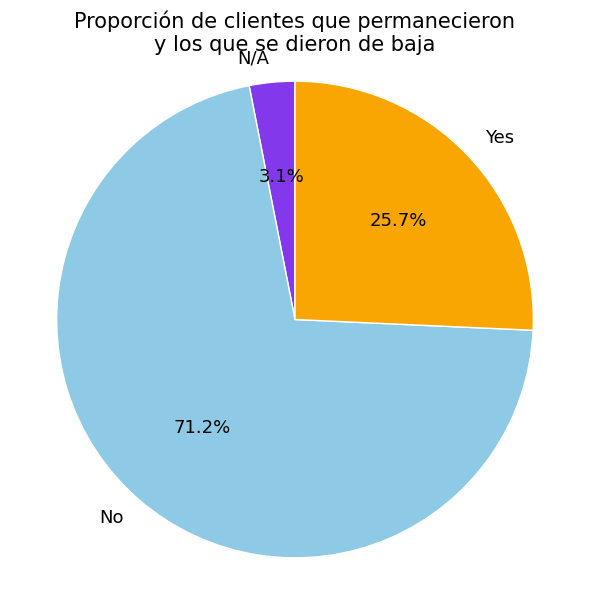

In [34]:
labels = df1.index  # O ['Permanecen', 'Darse de baja'] si es el caso

ax = df1['Total'].plot(
    kind='pie',
    labels=labels,  # Asegura que muestre etiquetas en el gráfico
    autopct='%1.1f%%',  # Más decimales
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 13},
    legend=False,
    figsize=(6, 6),
    colors=['#8338ec', '#8ecae6', '#F9A602']
)

plt.title('Proporción de clientes que permanecieron\ny los que se dieron de baja', fontsize=15)
plt.ylabel('')  # Quita el label de Y que sale por defecto

plt.axis('equal')  # Hace el círculo perfecto

plt.tight_layout()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')
plt.show()


- 📊 Análisis visual de evasión: mapa de calor por género, contrato y servicio

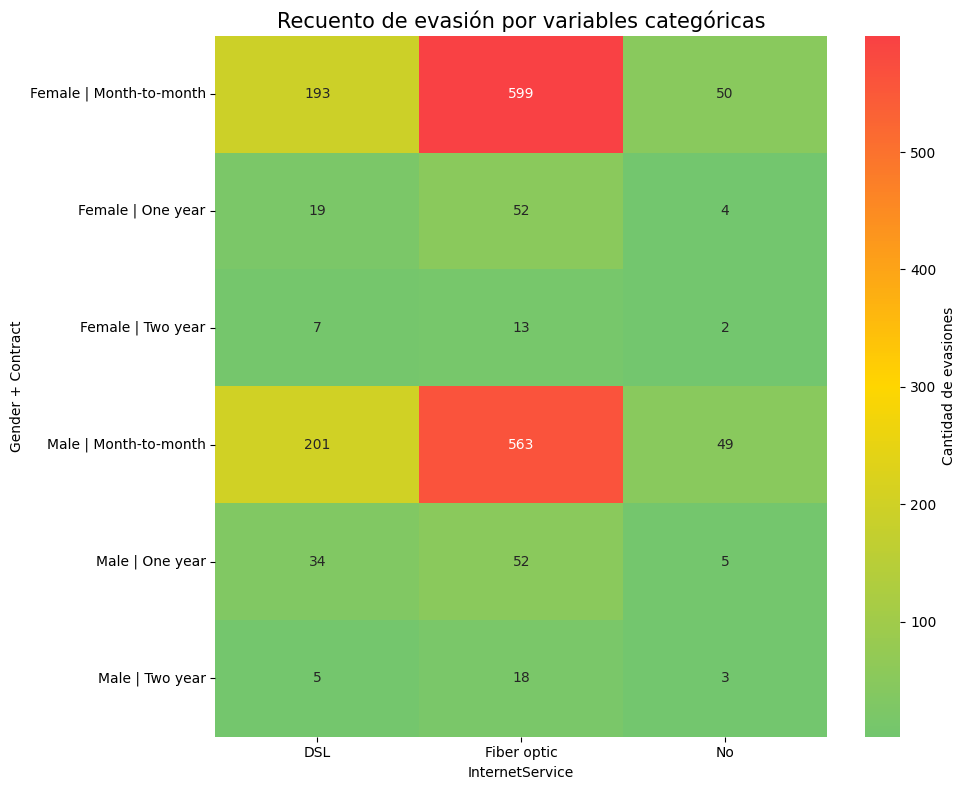

In [41]:
from matplotlib.colors import LinearSegmentedColormap

# Solo clientes que hicieron churn
cliente_evade = df.query('Churn == "Yes"').copy()

# Combina las variables para el análisis
cliente_evade['Gender_Contract'] = cliente_evade['Gender'].astype(str) + " | " + cliente_evade['Contract'].astype(str)

# Agrupa y pivotea para el heatmap
heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack(fill_value=0)

# Colormap tipo semáforo
semaforo = LinearSegmentedColormap.from_list('semaforo', ["#73C66E", "#FFD600", "#F94144"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap=semaforo,
    cbar_kws={'label': 'Cantidad de evasiones'}
)
plt.title('Recuento de evasión por variables categóricas', fontsize=15)
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.tight_layout()
plt.show()

In [42]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


- 📊 Boxplots de evasión según variables numéricas

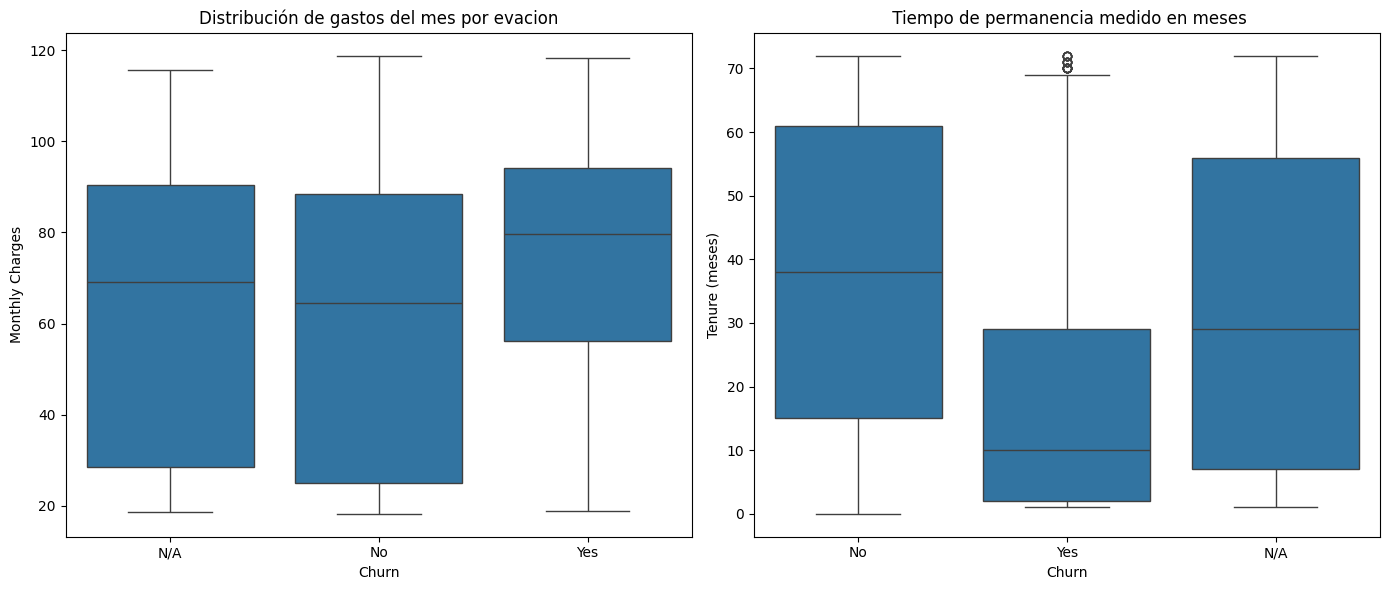

In [45]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()


#📄Informe final

- 📖 Informe de ETL y Análisis Exploratorio

1. Extracción de datos

  Fuente: https://raw.githubusercontent.com/eD07/ChallengeDataScienceTelecomX/main/TelecomX_Data.json


2. Transformación (T - Transform) 📦

    a) Normalización de estructuras anidadas:
    Las columnas anidadas (customer, phone, account, internet) se normalizaron y fusionaron en el DataFrame principal para facilitar el análisis.

    b) 🧹 Limpieza de datos:
    Se detectaron 0 valores nulos y 0 duplicados en customerID.
    Se convirtieron columnas de tipo object a tipo numérico (Charges.Total, Charges.Monthly).
    Se eliminaron las columnas originales luego de la transformación.

    c) 🏷️ Renombrado y creación de nuevas variables:
    Se renombraron columnas clave para mayor claridad (gender → Gender, tenure → Tenure, customerID → CustomerID).
    Se creó la columna DailyCharges dividiendo el gasto mensual por 30.

    d) 🔄 Transformación de variables categóricas:
    Columnas binarias (como Partner, Dependents, PhoneService, PaperlessBilling, MultipleLines) fueron convertidas a 1/0.

    Otras columnas como OnlineSecurity, TechSupport, etc., también fueron transformadas a binario.

    La variable Contract fue mapeada numéricamente (Month-to-month → 1, etc.).

    La variable Churn se estandarizó para contener solo valores “Yes” o “No”.


3. Carga (L - Load) 💾
El DataFrame procesado fue guardado como:
Churn_de_Clientes.json

4. Análisis Exploratorio 📊
Proporción de clientes que abandonaron:
Se generó un gráfico de torta que muestra que una proporción significativa de clientes se dio de baja.

  🔥 Análisis de clientes que abandonaron:
  Se construyó una tabla y un heatmap que muestran el recuento de evasión por género, tipo de contrato y servicio de internet.
  Los colores tipo semáforo (verde = bajo, rojo = alto) facilitan la interpretación visual.

  📦 Análisis por variables numéricas:

    a) Gastos mensuales (Monthly Charges): Los clientes que se dieron de baja tienden a tener cargos mensuales más altos.

  b) Tiempo de permanencia (Tenure): Los clientes que permanecen tienen una antigüedad significativamente mayor.

  Gráficos tipo boxplot muestran estas tendencias de manera clara.

📌 Conclusiones

  Contratos a corto plazo, cargos mensuales elevados y menor antigüedad están fuertemente correlacionados con la evasión de clientes (churn).

  Este análisis preliminar sienta las bases para modelos predictivos y estrategias de retención más efectivas.

  El tipo de servicio de internet influye de manera importante: clientes con servicios como DSL o sin protecciones adicionales (OnlineSecurity, TechSupport, etc.) presentan mayor frecuencia de abandono.

